# Load data from the allen and plot reference structures

The first cell takes a while. It needs to download data for the allen common reference framework and it takes a while to actually isolate the contours for each reference.

The references are in milimeters and in reference to a reference point, for example the approximate location of bregma. 

The following scripts are to compute new references. There are shipped by default:

|dorsal_cortex|vis_som |
|-------------|--------|
|MOB          | RSPv   |
|FRP          | RSPd   |
|MOp          | SSs    |
|MOs          | SSp-bfd|
|SSp-n        | SSp-tr |
|SSp-m        | SS-ll  |
|SSp-un       | SS-ul  |
|ACAd         | VISli  |
|RSPv         | VISp   |
|RSPd         | VISpm  |
|RSPagl       | VISl   |
|VISC         | VISal  |
|SSs          | VISrl  |
|SSp-bfd      | VISa   |
|SSp-tr       | VISam  |
|SSp-ll       | SSp-un |
|SSp-ul       | SSp-n  |
|TEa          |        |
|AUDd         |        |
|AUDp         |        |
|AUDpo        |        |
|AUDv         |        |
|VISli        |        |
|VISpor       |        |
|VISpl        |        |
|VISpm        |        |
|VISl         |        |
|VISal        |        |
|VISrl        |        |
|VISa         |        |
|VISam        |        |
|VISp         |        |

The default reference files are copied on install. This is how to generate them.

## dorsal cortex 

In [ ]:
from wfield.allen import *

reference_name = 'dorsal_cortex'
selection = selection_dorsal_cortex
resolution = 10

# Get reference data by querying the allen Common Coordinate Framework
# # this takes a while
mask_volume, areas = allen_volume_from_structures(structures = selection,
                                                  resolution=10, 
                                                  version = 'annotation/ccf_2017')
# Save volume (not used)
# np.save(pjoin(annotation_dir,'{0}_volume.npy'.format(reference_name)),mask_volume)
# Flatten the volume to get a top view projection 
# (reference to a bregma estimate location of )
proj, ccf_regions = allen_flatten_areas(areas,mask_volume,resolution = resolution, reference= [540,570])
# get the projection outline (for masking and so)
brainoutline = projection_outline(proj, resolution,reference = [540,570])

# Save all this 
allen_save_reference(ccf_regions,proj,brainoutline,reference_name)

In [4]:
from wfield import *
# Load references
ccf_regions,proj,brain_outline = allen_load_reference('dorsal_cortex')

ccf_regions.head()

,acronym,name,reference,resolution,label,allen_id,allen_rgb,left_center,right_center,left_x,left_y,right_x,right_y
0,MOB,Main olfactory bulb,"[540, 570]",10,1,507,"[154, 210, 189]","[-1.0204336826, -4.2703367543]","[1.0204336826, 7.1296632457]","[-0.06, -0.065, -0.065, -0.07, -0.075, -0.075,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -...","[0.06, 0.065, 0.065, 0.07, 0.075, 0.075, 0.08,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -..."
1,FRP,"Frontal pole, cerebral cortex","[540, 570]",10,2,184,"[38, 143, 69]","[-0.9698151951, -3.5235934292]","[0.9698151951, 7.8764065708]","[-0.6900000000000001, -0.7000000000000001, -0....","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45...","[0.6900000000000001, 0.7000000000000001, 0.71,...","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45..."
2,MOp,Primary motor area,"[540, 570]",10,3,985,"[31, 157, 90]","[-2.1104203178, -1.0662226896]","[2.1104203178, 10.3337773104]","[-0.74, -0.75, -0.76, -0.77, -0.78, -0.79, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
3,MOs,Secondary motor area,"[540, 570]",10,4,993,"[31, 157, 90]","[-1.1233387919, -1.8385300769000001]","[1.1233387919, 9.5614699231]","[-0.22, -0.23, -0.24, -0.25, -0.26, -0.27, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.2...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
4,SSp-n,"Primary somatosensory area, nose","[540, 570]",10,5,353,"[24, 128, 100]","[-3.9726763679, 0.0650291036]","[3.9726763679, 11.4650291036]","[-4.47, -4.48, -4.485, -4.485, -4.485, -4.485,...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,...","[4.47, 4.48, 4.485, 4.485, 4.485, 4.485, 4.485...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,..."


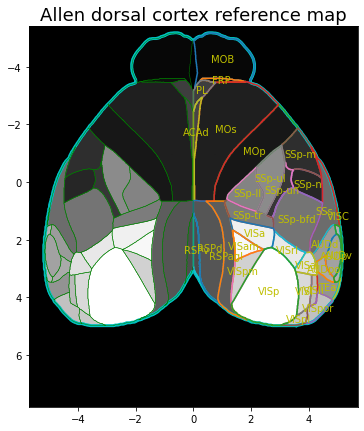

In [5]:
# Plot the reference areas
%matplotlib inline
plt.figure(figsize=[7,7])
plt.imshow(proj,extent = allen_proj_extent(proj,ccf_regions),origin='top',cmap = 'gray')
plt.plot(brain_outline[:,0],brain_outline[:,1],'c',lw=3)

for c in ccf_regions.iterrows():
    c = c[1]
    plt.plot(c.right_x,c.right_y)#,color=np.array(c['allen_rgb'])/255)
    plt.text(c.right_center[0],c.left_center[1],c.acronym,color='y',va='center',
             ha='center')
    plt.plot(c.left_x,c.left_y,'g',lw=.5)

plt.axis(allen_proj_extent(proj,ccf_regions, foraxis=True))
plt.title('Allen dorsal cortex reference map',fontsize=18);

## Posterior part of the dorsal cortex

In [ ]:
from wfield.allen import *

reference_name = 'vis'
selection = selection_vis_som
resolution = 10
reference = [850,306]

# Get reference data by querying the allen Common Coordinate Framework
# # this takes a while
mask_volume, areas = allen_volume_from_structures(structures = selection,
                                                  resolution=10, 
                                                  version = 'annotation/ccf_2017')
# Save volume (not used)
# np.save(pjoin(annotation_dir,'{0}_volume.npy'.format(reference_name)),mask_volume)
# Flatten the volume to get a top view projection 
# (reference to a bregma estimate location of )
proj, ccf_regions = allen_flatten_areas(areas,mask_volume,
                                        resolution = resolution,
                                        reference= reference,
                                        gaussfilt=1)
# get the projection outline (for masking and so)
brainoutline = projection_outline(proj, 
                                  resolution,
                                  reference = reference)

# Save all this 
allen_save_reference(ccf_regions,proj,brainoutline,reference_name)

0it [00:00, ?it/s]

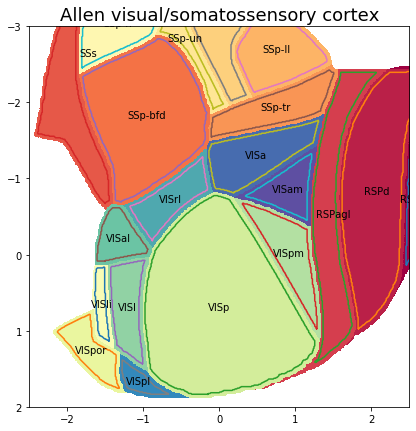

In [1]:
from wfield import *
# Load references
ccf_regions,proj,brain_outline = allen_load_reference('vis')

# Plot the reference areas
%matplotlib inline
plt.figure(figsize=[7,7])
proj = proj.astype('float32')
proj[proj == 0] = np.nan
p = proj[:,:int(proj.shape[1]/2)]
plt.imshow(p,extent = allen_proj_extent(p,ccf_regions),
           origin='top',cmap = 'Spectral')
# plt.plot(brain_outline[:,0],brain_outline[:,1],'c',lw=3)

for c in ccf_regions.iterrows():
    c = c[1]
    plt.plot(c.left_x,c.left_y)
    plt.text(c.left_center[0],c.left_center[1],c.acronym,
             color='k',va='center',clip_on=True,
             ha='center')    #     plt.plot(c.left_x,c.left_y,'g',lw=.5)
    
plt.axis(allen_proj_extent(p,ccf_regions, foraxis=True))
plt.axis([-2.5,2.5,2,-3])
plt.title('Allen visual/somatossensory cortex',fontsize=18);